In [1]:
import ROOT
import numpy as np

In [2]:
# Load ROOT file and tree
df = ROOT.RDataFrame("bkg", "dataBkg.root")

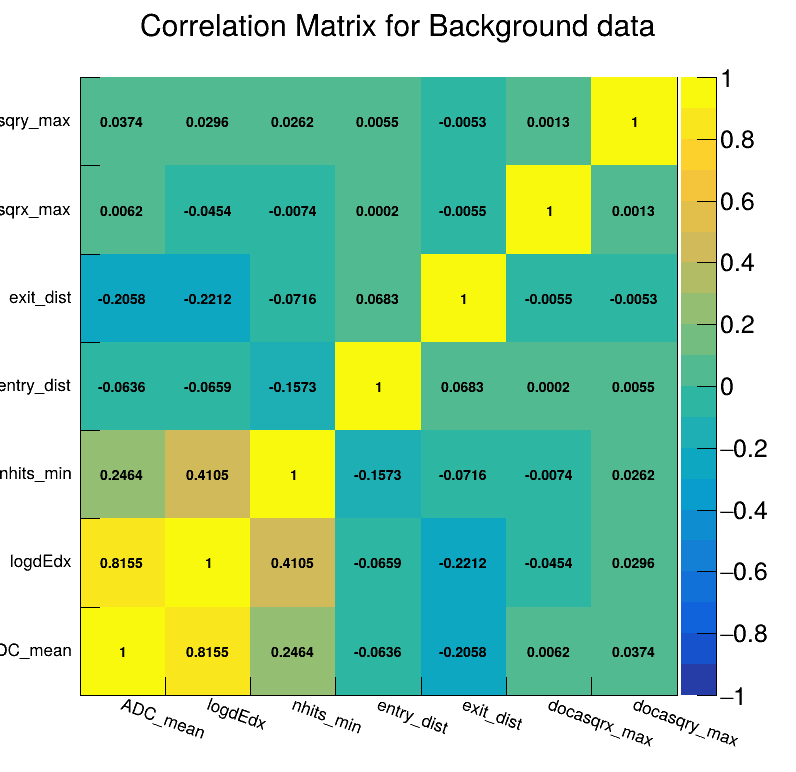

In [3]:
#filtering nan from signal file
df = df.Filter("dEdx > 0 && dEdx < 1e6")  # Avoid very large values

# Define the branches to analyze
columns = ["ADC_mean", "logdEdx", "nhits_min", "entry_dist", "exit_dist", "docasqrx_max", "docasqry_max"]

# Extract data as NumPy arrays
data_dict = df.AsNumpy(columns)
data_matrix = np.stack([data_dict[col] for col in columns], axis=1)

# Compute correlation matrix
corr_matrix = np.corrcoef(data_matrix, rowvar=False)

# Create a ROOT 2D histogram for plotting
n = len(columns)
h2 = ROOT.TH2D("corr", "Correlation Matrix for Background data", n, 0, n, n, 0, n)

# Fill the histogram and set axis labels
for i in range(n):
    for j in range(n):
        value = round(corr_matrix[i, j], 4)  
        h2.SetBinContent(i+1, j+1, value)
        h2.GetXaxis().SetBinLabel(i+1, columns[i])
        h2.GetYaxis().SetBinLabel(j+1, columns[j])

# Style: color gradient
ROOT.gStyle.SetOptStat(0)
ROOT.gStyle.SetPalette(ROOT.kBird)  # Other palettes: kViridis, kCool, kRainBow

# Draw as color map with text
canvas = ROOT.TCanvas("c", "Correlation Matrix for Background", 800, 800)
h2.GetZaxis().SetRangeUser(-1.0, 1.0)  # Force full correlation scale
h2.Draw("COLZ TEXT")
canvas.SetRightMargin(0.15)  # To make room for color scale
canvas.Update()

In [4]:
canvas.SaveAs("variable_selection/MLInputVars/corrmatrix_bkg.png")

Info in <TCanvas::Print>: png file variable_selection/MLInputVars/corrmatrix_bkg.png has been created
